## <center> École Polytechnique de Montréal <br> Département Génie Informatique et Génie Logiciel <br>  INF8460 – Traitement automatique de la langue naturelle <br> </center>
## <center> TP4  - Annotation de questions avec Wikidata <br>  Automne 2023 </center>

## Identification de l'équipe:

### Groupe de laboratoire: 02

### Equipe numéro : 13

### Membres:

- Sebastian Villanueva (2087346) (33% de contribution, code partie 1 + réflexions sur les architectures)
- Lucas Bertinchamp (2312324) (33% de contribution, code partie 2 + réflexions sur les architectures)
- Antoine Toussaint (2312379) (33% de contribution, code partie 3 + réflexions sur les architectures)

* nature de la contribution: Décrivez brièvement ce qui a été fait par chaque membre de l’équipe. Tous les membres sont censés contribuer au développement. Bien que chaque membre puisse effectuer différentes tâches, vous devez vous efforcer d’obtenir une répartition égale du travail.

## 1. DESCRIPTION

Dans le cadre de ce projet, vous effectuerez une annotation de questions en langue naturelle en utilisant différents modèles avec pour objectif ultime de proposer une méthode qui dépasse les performances des équipes concurrentes.

Par exemple, étant donnée la question:
What is the country for head of state of Justin Trudeau ?
Votre modèle devra retourner :
what is the <\<wd:Q6256\>> for <\<wdt:P35\>> of <\<wd:Q3099714\>> ?

Les éléments ayant pour préfixe wd sont des URIs de Wikidata. Par exemple wd:Q6256 correspond à l'URI https://www.wikidata.org/wiki/Q6256

Wikidata est une base de données collaborative et structurée qui fait partie du projet Wikimedia, tout comme Wikipédia. Contrairement à Wikipédia, qui se concentre sur la création et la gestion de contenu encyclopédique, Wikidata se spécialise dans la collecte et la gestion de données structurées.

**Ressources Wikidata :**

Les ressources sont des entités du monde réel avec un identifiant unique précédé du préfixe "wd".

Voici quelques exemples d'éléments :

1. **La Tour Eiffel (Identifiant : Q243)** - Il s'agit d'un élément représentant la célèbre tour située à Paris.

2. **Albert Einstein (Identifiant : Q937)** - C'est un élément qui représente le physicien renommé.

3. **Mona Lisa (La Joconde) (Identifiant : Q12418)** - Un élément correspondant à l'œuvre d'art iconique de Leonardo da Vinci.

**Propriétés Wikidata :**

Les propriétés sont des caractéristiques ou des informations spécifiques associées aux éléments. Chaque propriété a un identifiant unique avec l'un des préfixes suivant: "wdt", "ps" ou "pq" et est utilisée pour décrire, quantifier ou qualifier les éléments. Voici des exemples de propriétés avec les éléments correspondants :

1. **Hauteur (Propriété : P2049)** - Une propriété utilisée pour indiquer la hauteur d'une structure. Par exemple, la hauteur de la Tour Eiffel est stockée dans cette propriété.

2. **Date de naissance (Propriété : P569)** - Une propriété pour enregistrer la date de naissance des individus. Par exemple, la date de naissance d'Albert Einstein est stockée grâce à cette propriété.

3. **Créateur (Propriété : P170)** - Cette propriété est utilisée pour spécifier qui a créé une œuvre d'art. Dans le cas de la Mona Lisa, on associe cette propriété à l'élément correspondant pour indiquer que Leonardo da Vinci en est le créateur.


Le jeu de données utilisé comprend des questions rédigées en langage naturel, ainsi que ces mêmes questions annotées avec des identifiants provenant de la base de connaissances Wikidata.

Pour illustrer ce jeu de données, voici un exemple :

| question_id |        question_raw        |                 question_original                 |              question_tagged               |
| :---------: | :------------------------: | :---------------------------------------------: | :---------------------------------------: |
|     1       | What is the country for head of state of Justin Trudeau | What is the {country} for {head of state} of {Justin Trudeau} | what is the <\<wd:Q6256\>> for <\<wdt:P35\>> of <\<wd:Q3099714\>> |


Vous pouvez trouver la correspondance des éléments dans les liens suivants:
- __{country}__ : https://www.wikidata.org/wiki/Q6256
- __{head of state}__ : https://www.wikidata.org/wiki/Property:P35
- __{Justin Trudeau}__ : https://www.wikidata.org/wiki/Q3099714  

## 2. LIBRARIES PERMISES
- Numpy
- Pandas
- HuggingFace
- Keras
- NLTK
- SPACY
- Pytorch
- re


- Pour toute autre librairie, demandez à votre chargé de laboratoire

## 3. INFRASTRUCTURE

- Vous avez accès aux GPU du local L-4818. Dans ce cas, vous devez utiliser le dossier temp (voir le tutoriel VirtualEnv.pdf)
- Vous pouvez aussi utiliser l’environnement Google Colab :  https://colab.research.google.com/

## 4. ÉCHÉANCE

- Fin de la session. La date précise sera indiquée dans les boites de remise sur Moodle.


## 5. KAGGLE

La compétion Kaggle sera accessible ici à partir du 25 octobre 2023 jusqu'au 3 décembre 2023: https://www.kaggle.com/t/c8a54f4f24c942d1b58065f0c2d9c227.

Vous devez former des équipes de 3 personnes sur Kaggle avec le même nom d'équipe que sur Moodle.

Le TP4 se fera sous forme d’une compétition Kaggle.  Vous devrez utiliser l’environnement Kaggle pour la soumission et l’évaluation de vos meilleurs modèles.  
Pour tester votre modèle au fur et à mesure, vous aurez le droit à 4 soumissions par jour sur Kaggle. Vous verrez deux types de résultats sur votre « private leaderboard » et votre « public leaderboard » :
- Le « public leaderboard » est calculé sur approximativement 30% des données de test, choisies aléatoirement par Kaggle. Ce score est public et est calculé sur la même tranche de données pour tous les participants.
- Le « private leaderboard » est calculé sur approximativement 70% des données de test et n’est visible qu’à la fin de la compétition. Le résultat final sera basé sur ce leaderboard. Si aucune soumission n’est choisie, la soumission avec le meilleur score sur le « public leaderboard » sera utilisée pour calculer le score sur le « private leaderboard ».

Pour l’évaluation, vous devrez soumettre un fichier de données _tp4_submission.csv_ du même format que le fichier _sample_submission.csv_ (disponible sur le site de la compétition et Moodle).


## 6. DESCRIPTION DES DONNÉES ET MÉTRIQUES D’ÉVALUATION

Le corpus est un corpus de questions annotées avec leur identifiant Wikidata. Trois documents sont fournis :
- Les 19603 questions annotées d’entrainement dans un fichier train.csv.
- Les 2183 questions annotées de validation dans un fichier validation.csv.
- Les 5446 questions de test pour lesquelles vous devez identifier les URIs wikidata.

La sortie de votre modèle sera comparée à notre ensemble de référence. Vous serez évalués en utilisant la métrique « F1-Score Macro » sur les identifiants prédits par vos modèles dans la compétition Kaggle.

Voici un exemple :

Jeu de test pour la compétition:

|   question_id   |           question_raw          |
|    :----:       | :-----------------------------: |
|      1          | what is the country for head... |
|      2          | what is child of of husband...  |



Soumission:

Vous avez dans le fichier __id_to_label.csv__ la correspondance entre le ID qui correspond à un des éléments à annoter, le id de la question du jeu de test et le label (ou la mention) auquel vous devez associer une URI.

|   Id   |   question_id   |        label                |
|    :----:     |      :----:     | :------------------: |
|      1        |        1        |       country        |
|      2        |        1        |    head of state     |
|      3        |        1        |   Justin Trudeau     |
|      4        |        2        |      child of        |
|      5        |        2        |       husband        |
|      6        |        2        |    Ranavalona I      |


Votre fichier de soumission pour Kaggle doit contenir deux colonnes: __Id__ et __Target__ et contenir les URIs reliées aux Id donnés dans _id_to_label.csv_

|   Id       |                  Target                 |
|    :----:  |           :----------------:            |
|      1     |                wd:Q6256                 |
|      2     |                 wdt:P35                 |
|      3     |               wd:Q3099714               |
|      4     |     __Prédiction de votre modèle__      |
|      5     |     __Prédiction de votre modèle__      |
|      6     |     __Prédiction de votre modèle__      |

Donc, la __cible__ du __Id__ __#4__ correspond à trouver l'URI correspondant à la mention/ au label  __"child of"__ de la question 2 du jeu de test.


Vos labels prédits doivent avoir le bon Id pour que Kaggle puisse réaliser le bon alignement entre votre prédiction et la référence.

## 7. ÉTAPES DU TP

À partir de ce notebook squelette, vous devez réaliser les étapes suivantes. (Notez que les cellules dans le squelette sont là à titre informatif, vous devrez rajouter des cellules au fur et à mesure de votre TP).

### 7.0. Analyse exploratoire (5%)


#### 7.0.1. Déterminez le nombre d'identifiants uniques du jeu d'entrainement


Les codes des partie 7.1 7.2 et 7.3 sont faites pour être éxecutées de manière indépendantes. Les imports nécessaires, le mount collab, et la définition du root sont faites en début de chaque partie.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ROOT A MODIFIER SELON L'EMPLACEMENT DES MODELES
root = 'drive/MyDrive/TALN/tp4/'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

In [ ]:
# Lecture des données
train_data = pd.read_csv(root + 'data/train.csv', sep='|')

train_different_id = set()
train_id = Counter()

for row in train_data.question_tagged:
    ids = re.findall(r'<<\w*:\w*>>', row)
    for id in ids:
        train_different_id.add(id)
    train_id.update(ids)

print("Nombre d'identifiants dans le train set: ", sum(train_id.values()))
print("Nombre d'identifiants différents dans le train set: ", len(train_different_id))


Nombre d'identifiants dans le train set:  55701
Nombre d'identifiants différents dans le train set:  19935


#### 7.0.2. Déterminez le pourcentage d'identifiants uniques inconnus du jeu de validation.

Affichez le résultat dans un diagramme circulaire.


Text(0.5, 1.0, "Pourcentage d'identifiants inconnus dans le validation set")

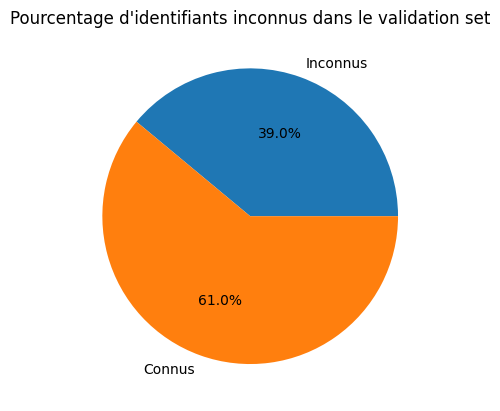

In [ ]:
val_data = pd.read_csv(root + 'data/validation.csv', sep='|')

val_different_id = set()
val_id = Counter()

for row in val_data.question_tagged:
    ids = re.findall(r'<<\w*:\w*>>', row)
    for id in ids:
        val_different_id.add(id)
    val_id.update(ids)

unknown_id = val_different_id - train_different_id
percentage_unknown = len(unknown_id) / len(val_different_id) * 100

plt.pie([percentage_unknown, 100 - percentage_unknown], labels=['Inconnus', 'Connus'], autopct='%1.1f%%')
plt.title("Pourcentage d'identifiants inconnus dans le validation set")

#### 7.0.3. Déterminez les 10 identifiants uniques les plus fréquents du jeu d'entrainement.

Affichez le résultat dans un diagramme à barres.


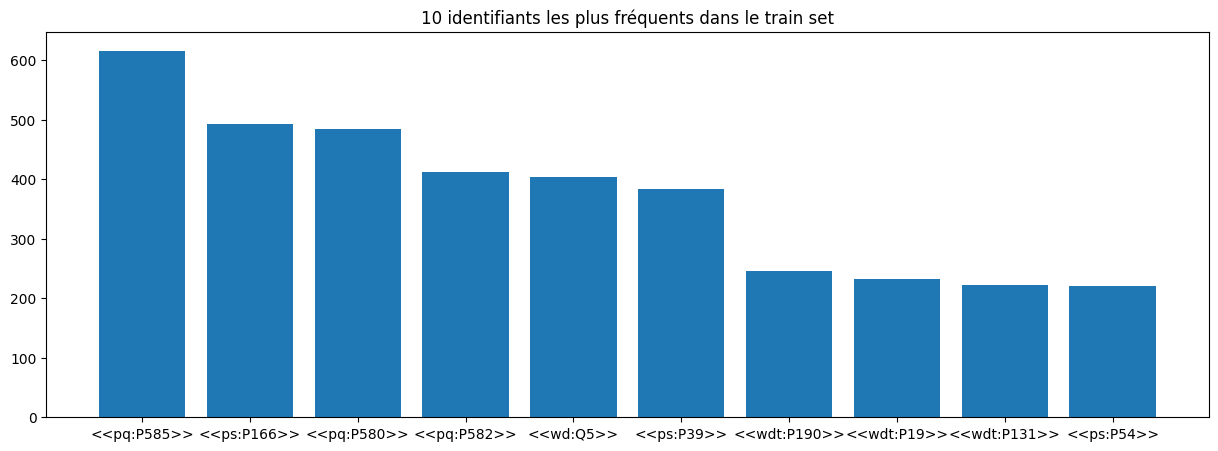

In [ ]:
most_common_train = train_id.most_common(10)

plt.figure(figsize=(15, 5))
plt.bar([x[0] for x in most_common_train], [x[1] for x in most_common_train])
plt.title('10 identifiants les plus fréquents dans le train set')
plt.show()

#### 7.0.4. Déterminez la proportion des identifiants uniques qui sont des ressources Wikidata.

Affichez le résultat dans un diagramme circulaire.

Text(0.5, 1.0, "Pourcentage d'identifiants de ressources dans le train set")

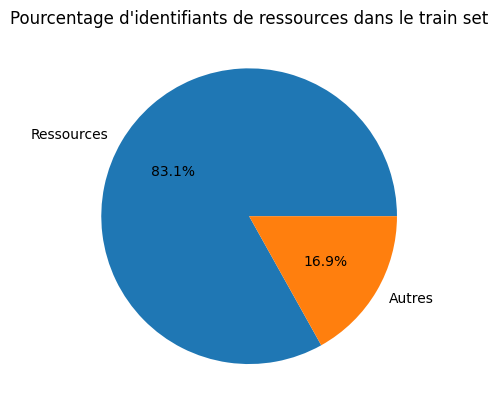

In [ ]:
# On regarde les identifiants du train set
wd_ressources_train = [wd for wd in train_id if wd.startswith('<<wd:')]
resources_freq_train = len(wd_ressources_train) / len(train_different_id) * 100

plt.pie([resources_freq_train, 100 - resources_freq_train], labels=['Ressources', 'Autres'], autopct='%1.1f%%')
plt.title("Pourcentage d'identifiants de ressources dans le train set")

#### 7.0.5. Déterminez la fréquence de chaque entité Wikidata du jeu d'entrainement, ordonnée par fréquence décroissante et affichez une courbe fréquence - rang.

Créez un graphique de courbe fréquence-rang pour visualiser la distribution des fréquences. Sur l'axe horizontal (rang), vous aurez la position des entités triées par ordre décroissant de fréquence, et sur l'axe vertical (fréquence), vous aurez le nombre d'occurrences de chaque entité.

<BarContainer object of 19554 artists>

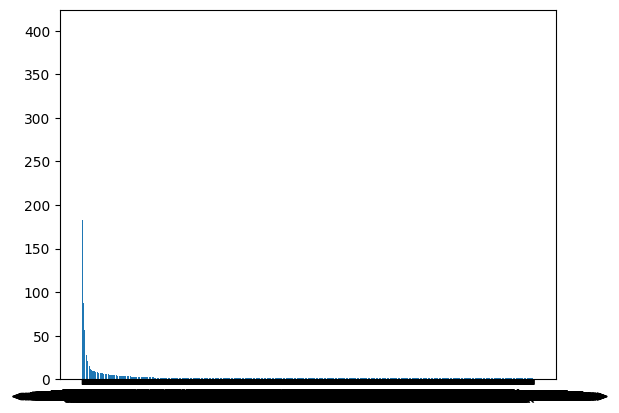

In [ ]:
# Ici entité = resources "wd" d'après un post sur Moodle
ressources = [i for i in train_id.items() if i[0][0:4] == "<<wd"]
sorted_train_id = sorted(ressources, key=lambda x: x[1], reverse=True)
plt.bar([x[0] for x in sorted_train_id], [x[1] for x in sorted_train_id])

### 7.1. Approche par classification de jeton (25%)

Entrainez un modèle (BERT, ROBERTA, etc.) pour classifier les jetons du __question_original__ avec le bon identifiant de Wikidata.

Votre modèle devrait utiliser le format BIO afin d'effectuer la classification.

Ainsi, si une entité se retrouve dans plusieurs jetons, vous devez indiquer qu'il s'agit du début de l'entité en rajoutant le préfixe __B-__ à la classe. Un jeton faisant partie de l'entité doit avoir le préfixe __I-__ à la classe.

Lorsqu'un jeton ne fait pas partie d'une entité, celui-ci devrait avoir la classe __O__

__Exemple:__

Jeu de validation:

|   question_id   |                  question_original                           |
|    :----:       | :----------------------------------------------:             |
|      1          | What is the {country} for {head of state} of {Justin Trudeau} |



__Étape à suivre:__

1. Vous devez segmenter la __question_original__ avec le "tokenizer" de votre choix
2. Pour chaque jeton, votre modèle doit prédire la classe associée

| __question_original__ tokenize | What | is | the | { | country | } | for | { | head | of | state | } | of | \{ | ... |
|------|------|----|-----|---|---------|---|-----|---|------|----|-------|---|---|---| --- |
| Résultat du modèle    | O    | O  | O   | B-wd:Q6256 | I-wd:Q6256 | I-wd:Q6256 | O | B-wdt:P35 | I-wdt:P35 | I-wdt:P35 | I-wdt:P35 | I-wdt:P35 | O | B-wd:Q3099714 | ... |



#### 7.1.1. Classification de jetons (20%)


In [ ]:
import huggingface_hub as hf_hub
from transformers import BertTokenizer
import torch

In [ ]:
# Initialisation du tokenizer et tokenisation des phrases du train set
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_sentences_tokens = []
train_attention_mask = []

for row in train_data.question_original:
    encoded = tokenizer.encode_plus(row, add_special_tokens=True, truncation=True, max_length=50, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')

    train_sentences_tokens.append(encoded['input_ids'][0])
    train_attention_mask.append(encoded['attention_mask'][0])

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
print('Original: ', train_data.question_original[0])
print('Token IDs:', train_sentences_tokens[0])
print('Masks:', train_attention_mask[0])

Original:  What is {child of} of {husband} of {Ranavalona I} ?
Token IDs: tensor([  101,  2054,  2003,  1063,  2775,  1997,  1065,  1997,  1063,  3129,
         1065,  1997,  1063, 22175, 10175,  7856,  1045,  1065,  1029,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
Masks: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])


In [ ]:
# Mise en forme des labels du train set
labels_set = set()
labels_set.add('O')
train_labels = []

for q_original, q_tagged in zip(train_data.question_original, train_data.question_tagged):

    tokenized_sentence = tokenizer.tokenize(q_original)
    labels = ['O'] * len(tokenized_sentence)

    ids = re.findall(r'<<\w*:*\w*>>', q_tagged)

    # On parcourt les mots de la phrase tokenisée et on assigne les labels
    continue_label = False
    current_id = None
    for index, word in enumerate(tokenized_sentence):
        if word == "{" and len(ids) > 0:
            current_id = ids.pop(0)
            continue_label = True
            labels[index] = 'B-' + current_id
            labels_set.add('B-' + current_id)
        elif continue_label:
            labels[index] = 'I-' + current_id
            labels_set.add('I-' + current_id)
            if word == "}":
                continue_label = False
                current_id = None

    train_labels.append(labels)

In [ ]:
# On assigne un identifiant à chaque label
labels_map = {label: i for i, label in enumerate(labels_set)}

In [ ]:
print("Sentence original: ", train_data.question_original[0])
print("Sentence tokenized: ", tokenizer.tokenize(train_data.question_original[0]))
print()
# Problème d'alignement entre les tokens et les labels (ajout des tokens spéciaux)
print("Sentence tokenized: ", train_sentences_tokens[0])
print("Labels index: ", [labels_map[label] for label in train_labels[0]])


Sentence original:  What is {child of} of {husband} of {Ranavalona I} ?
Sentence tokenized:  ['what', 'is', '{', 'child', 'of', '}', 'of', '{', 'husband', '}', 'of', '{', 'rana', '##val', '##ona', 'i', '}', '?']

Sentence tokenized:  tensor([  101,  2054,  2003,  1063,  2775,  1997,  1065,  1997,  1063,  3129,
         1065,  1997,  1063, 22175, 10175,  7856,  1045,  1065,  1029,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
Labels index:  [11298, 11298, 14732, 9737, 9737, 9737, 11298, 30447, 1940, 1940, 11298, 12611, 33170, 33170, 33170, 33170, 33170, 11298]


In [ ]:
# On ajoute le label -100 pour les tokens spéciaux
new_train_labels = []
null_label = -100

for sentence, labels in zip(train_sentences_tokens, train_labels):
    new_labels = []
    index = 0
    for token in sentence:
        if token == tokenizer.pad_token_id or token == tokenizer.cls_token_id or token == tokenizer.sep_token_id:
            new_labels.append(null_label)
        else:
            new_labels.append(labels_map[labels[index]])
            index += 1

    new_train_labels.append(new_labels)

In [ ]:
print('\nSentence:        ', train_data.question_original[0])
print('\nBERT Tokens:     ', tokenizer.tokenize(train_data.question_original[0]))
print('\nLabels:          ', train_labels[0])
print('\nBERT Tokens ids: ', train_sentences_tokens[0])
print('\nNew Labels ids:  ', new_train_labels[0])
print('\nMask:            ', train_attention_mask[0])


Sentence:         What is {child of} of {husband} of {Ranavalona I} ?

BERT Tokens:      ['what', 'is', '{', 'child', 'of', '}', 'of', '{', 'husband', '}', 'of', '{', 'rana', '##val', '##ona', 'i', '}', '?']

Labels:           ['O', 'O', 'B-<<wdt:P22>>', 'I-<<wdt:P22>>', 'I-<<wdt:P22>>', 'I-<<wdt:P22>>', 'O', 'B-<<wdt:P26>>', 'I-<<wdt:P26>>', 'I-<<wdt:P26>>', 'O', 'B-<<wd:Q169794>>', 'I-<<wd:Q169794>>', 'I-<<wd:Q169794>>', 'I-<<wd:Q169794>>', 'I-<<wd:Q169794>>', 'I-<<wd:Q169794>>', 'O']

BERT Tokens ids:  tensor([  101,  2054,  2003,  1063,  2775,  1997,  1065,  1997,  1063,  3129,
         1065,  1997,  1063, 22175, 10175,  7856,  1045,  1065,  1029,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])

New Labels ids:   [-100, 11298, 11298, 14732, 9737, 9737, 9737, 11298, 30447, 1940, 1940, 11298,

In [ ]:
# Création des tenseurs PyTorch

pt_train_sentences_tokens = torch.stack(train_sentences_tokens, dim=0)
pt_train_attention_mask = torch.stack(train_attention_mask, dim=0)
pt_train_labels = torch.tensor(new_train_labels)

print(len(pt_train_sentences_tokens))
print(len(pt_train_attention_mask))
print(len(pt_train_labels))

19603
19603
19603


In [ ]:
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

train_dataset = TensorDataset(pt_train_sentences_tokens, pt_train_attention_mask, pt_train_labels)

batch_size = 16

train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset),
            batch_size = batch_size
        )

In [ ]:
from transformers import BertForTokenClassification, AdamW, BertConfig

In [ ]:
model = BertForTokenClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = len(labels_map) + 1,
    output_attentions = False,
    output_hidden_states = False,
)

model.cuda()

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate
                  eps = 1e-8 # args.adam_epsilon
                )

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 5

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
import time
import numpy as np
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
if torch.cuda.is_available():

    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
# Code de training utilisé dans le notebook d'entrainement de BERT
import random

model.cuda()

device = torch.device("cuda")

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        result = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        loss = result.loss

        total_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))


print("")
print("Training complete!")


======== Epoch 1 / 5 ========
Training...
  Batch    40  of  1,226.    Elapsed: 0:00:09.
  Batch    80  of  1,226.    Elapsed: 0:00:18.
  Batch   120  of  1,226.    Elapsed: 0:00:27.
  Batch   160  of  1,226.    Elapsed: 0:00:36.
  Batch   200  of  1,226.    Elapsed: 0:00:45.
  Batch   240  of  1,226.    Elapsed: 0:00:53.
  Batch   280  of  1,226.    Elapsed: 0:01:02.
  Batch   320  of  1,226.    Elapsed: 0:01:10.
  Batch   360  of  1,226.    Elapsed: 0:01:19.
  Batch   400  of  1,226.    Elapsed: 0:01:27.
  Batch   440  of  1,226.    Elapsed: 0:01:36.
  Batch   480  of  1,226.    Elapsed: 0:01:45.
  Batch   520  of  1,226.    Elapsed: 0:01:53.
  Batch   560  of  1,226.    Elapsed: 0:02:02.
  Batch   600  of  1,226.    Elapsed: 0:02:10.
  Batch   640  of  1,226.    Elapsed: 0:02:19.
  Batch   680  of  1,226.    Elapsed: 0:02:27.
  Batch   720  of  1,226.    Elapsed: 0:02:36.
  Batch   760  of  1,226.    Elapsed: 0:02:45.
  Batch   800  of  1,226.    Elapsed: 0:02:53.
  Batch   840  of

In [ ]:
# On sauvegarde le modèle
model.save_pretrained(root + "model_bert/", from_pt = True)

In [ ]:
# On charge le modèle
model_2 = BertForTokenClassification.from_pretrained(root + "model_bert/")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

#### 7.1.2. Évaluation (5%)

Évaluez votre modèle sur le jeu de validation en utilisant la métrique «  Macro F1-Score Moyenne ».


Implémentez la fonction permettant de calculer la métrique Macro F1-Score Moyenne

In [ ]:
!pip install evaluate
!pip install seqeval
import evaluate
seqeval = evaluate.load("seqeval")
import numpy as np

def compute_metrics(p):

    label_list = list(labels_map.keys())
    predictions, labels = p

    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }


Evaluez votre modèle au moyen de votre fonction sur l'ensemble de validation.

In [ ]:
# Formatage des données de validation

val_sentences_tokens = []
val_attention_mask = []

for row in val_data.question_original:
    encoded = tokenizer.encode_plus(row, add_special_tokens=True, truncation=True, max_length=50, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')

    val_sentences_tokens.append(encoded['input_ids'][0])
    val_attention_mask.append(encoded['attention_mask'][0])

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
val_labels = []

for q_original, q_tagged in zip(val_data.question_original, val_data.question_tagged):

    tokenized_sentence = tokenizer.tokenize(q_original)
    labels = ['O'] * len(tokenized_sentence)

    ids = re.findall(r'<<\w*:*\w*>>', q_tagged)

    # On parcourt les mots de la phrase tokenisée et on assigne les labels
    continue_label = False
    current_id = None
    for index, word in enumerate(tokenized_sentence):
        if word == "{" and len(ids) > 0:
            current_id = ids.pop(0)
            continue_label = True
            labels[index] = 'B-' + current_id
        elif continue_label:
            labels[index] = 'I-' + current_id
            if word == "}":
                continue_label = False
                current_id = None

    val_labels.append(labels)

In [ ]:
new_val_labels = []

for sentence, labels in zip(val_sentences_tokens, val_labels):

    new_labels = []
    index = 0
    for token in sentence:
        if token == tokenizer.pad_token_id or token == tokenizer.cls_token_id or token == tokenizer.sep_token_id:
            new_labels.append(null_label)
        elif labels[index] in labels_map:
            new_labels.append(labels_map[labels[index]])
            index += 1
        else:
            new_labels.append(null_label)
            index += 1

    new_val_labels.append(new_labels)

In [ ]:
pt_val_sentences_tokens = torch.stack(val_sentences_tokens, dim=0)
pt_val_attention_masks = torch.stack(val_attention_mask, dim=0)
pt_val_labels = torch.tensor(new_val_labels, dtype=torch.long)

In [ ]:
# Set the batch size.
batch_size = 64

# Create the DataLoader.
prediction_data = TensorDataset(pt_val_sentences_tokens, pt_val_attention_masks, pt_val_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
# Prediction du val set (on ne le fait que sur 10 batchs de 64 sinon Collab explose)

print('Predicting labels for {:,} test sentences...'.format(len(pt_val_sentences_tokens)))

# Put model in evaluation mode
model_2.eval()
model_2.cuda()

# Tracking variables
predictions , true_labels = [], []

c= 0
# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to("cuda") for t in batch)
  if c % 5 == 0:
    print(f"Batch {c}")
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  b_input_ids = b_input_ids.to("cuda")
  b_input_mask = b_input_mask.to("cuda")
  b_labels = b_labels.to("cuda")

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      result = model_2(b_input_ids,
                      token_type_ids=None,
                      attention_mask=b_input_mask,
                      return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

  c+=1
  if c == 10:
    break

print('    DONE.')

Predicting labels for 2,183 test sentences...
Batch 0
Batch 5
    DONE.


In [ ]:
# On regroupe toutes les predictions et les labels en coupant les spéciaux ([PAD] ...)
all_predictions = []
all_labels = []
for (batch_predictions, batch_labels) in zip(predictions, true_labels):
    for (p, l) in zip(batch_predictions, batch_labels):
        predi = np.argmax(p, axis=1)
        lab = l
        while lab[-1] == null_label:
            lab = lab[:-1]
        predi = predi[:len(lab)]
        all_predictions.append(predi[1:])
        all_labels.append(lab[1:])

In [ ]:
predictions_flat = [item for batch in predictions for item in batch]
true_labels_flat = [item for batch in true_labels for item in batch]

In [ ]:
results = compute_metrics((predictions_flat, true_labels_flat))
print("All results : ")
print("F1-score : " + str(results["f1"]))
print("Precision : " + str(results["precision"]))
print("Recall : " + str(results["recall"]))
print("Accuracy : " + str(results["accuracy"]))

/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


All results : 
F1-score : 0.4263657957244656
Precision : 0.3500731350560702
Recall : 0.5451784358390281
Accuracy : 0.8136411516853933


### 7.2. Approche générative (30%)

Entrainez un modèle séquence à séquence de type T5 partant de la __question_raw__ et qui génére la __question_tagged__ correspondante.

__Exemple:__

Jeu de validation:

|   question_id   |                  question_raw                          |
|    :----:       | :----------------------------------------------:            
|      1          | What is the country for head of state of Justin Trudeau |


__Entrée du modèle:__ What is the country for head of state of Justin Trudeau

__Prédiction du modèle__:  what is the <\<wd:Q6256\>> for <\<wdt:P35\>> of <\<wd:Q3099714\>>



#### 7.2.1. Modèle génératif (25%)

In [ ]:
# Utilisation de T5 (nécessite sentencepiece)
!pip install transformers[torch]
!pip install sentencepiece
from transformers import T5Tokenizer, T5ForSequenceClassification
import torch
import pandas as pd
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import T5ForConditionalGeneration, AdamW
from transformers import get_linear_schedule_with_warmup
import re
import numpy as np

# ROOT A MODIFIER SELON L'EMPLACEMENT DES MODELES
root = 'drive/MyDrive/TALN/tp4/'

In [ ]:
# Initialisation du tokenizer et tokenisation des phrases du train set
tokenizer = T5Tokenizer.from_pretrained('t5-base')
tokenizer.add_tokens(["<<", ">>"])

train_data = pd.read_csv(root + 'data/train.csv', sep='|')

train_sentences_tokens = []
train_attention_mask = []

for row in train_data.question_raw:
    encoded = tokenizer.encode_plus(row, add_special_tokens=True, truncation=True, max_length=100, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')

    train_sentences_tokens.append(encoded['input_ids'][0])
    train_attention_mask.append(encoded['attention_mask'][0])

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:240: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the

In [ ]:
# Mise en forme des labels du train set
train_labels_tokens = []

for row in train_data.question_tagged:
    train_labels_tokens.append(tokenizer.encode_plus(row, add_special_tokens=True, truncation=True, max_length=100, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')['input_ids'][0])


In [ ]:
print('Original: ', train_data.question_raw[0])
print('Token IDs:', train_sentences_tokens[0])
print("Tokens: ", tokenizer.convert_ids_to_tokens(train_sentences_tokens[0]))
print('Masks:', train_attention_mask[0])

print('Labels:', train_labels_tokens[0])
print("Labels tokens: ", tokenizer.convert_ids_to_tokens(train_labels_tokens[0]))

Original:  what is child of of husband of ranavalona i ?
Token IDs: tensor([ 125,   19,  861,   13,   13, 2553,   13, 4037,    9, 2165,  106,    9,
           3,   23,    3,   58,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0])
Tokens:  ['▁what', '▁is', '▁child', '▁of', '▁of', '▁husband', '▁of', '▁ran', 'a', 'val', 'on', 'a', '▁', 'i', '▁', '?', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad

In [ ]:
# Création des tenseurs PyTorch
pt_train_sentences_tokens = torch.stack(train_sentences_tokens, dim=0)
pt_train_attention_mask = torch.stack(train_attention_mask, dim=0)
pt_train_labels = torch.stack(train_labels_tokens, dim=0)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx].clone().detach(),
            'attention_mask': self.attention_masks[idx].clone().detach(),
            'labels': self.labels[idx].clone().detach(),
        }

train_dataset = CustomDataset(pt_train_sentences_tokens, pt_train_attention_mask, pt_train_labels)

batch_size = 16

train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset),
            batch_size = batch_size
        )

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
model = AutoModelForSeq2SeqLM.from_pretrained(
    "t5-base",
)

In [ ]:
# On entraine sur 8 epochs mais avec sauvegardes regulières pour garder le meilleur possible
training_args = Seq2SeqTrainingArguments(
    output_dir= root + "t5-fine-tuned-1e3v2/",
    learning_rate=1e-3, # Avant 2e-5
    per_device_train_batch_size=16,
    save_total_limit=4,
    save_strategy='epoch',
    num_train_epochs=5,
    predict_with_generate=True,
    weight_decay=0.01
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
)

In [ ]:
trainer.train()

Step,Training Loss
500,0.301600
1000,0.262800
1500,0.245400
2000,0.231200
2500,0.220600
3000,0.207400
3500,0.205100
4000,0.192800
4500,0.183600
5000,0.180500


TrainOutput(global_step=6130, training_loss=0.21280582235065604, metrics={'train_runtime': 4756.7998, 'train_samples_per_second': 20.605, 'train_steps_per_second': 1.289, 'total_flos': 1.165761868032e+16, 'train_loss': 0.21280582235065604, 'epoch': 5.0})

In [ ]:
# Mise en forme des données de validation

val_data = pd.read_csv(root + 'data/validation.csv', sep='|')

val_sentences_tokens = []
val_attention_mask = []

for row in val_data.question_raw:
    encoded = tokenizer.encode_plus(row, add_special_tokens=True, truncation=True, max_length=100, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')

    val_sentences_tokens.append(encoded['input_ids'][0])
    val_attention_mask.append(encoded['attention_mask'][0])

# Mise en forme des labels du validation set
val_labels_tokens = []

for row in val_data.question_tagged:
    val_labels_tokens.append(tokenizer.encode_plus(row, add_special_tokens=True, truncation=True, max_length=100, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')['input_ids'][0])

# Création des tenseurs PyTorch
pt_val_sentences_tokens = torch.stack(val_sentences_tokens, dim=0)
pt_val_attention_mask = torch.stack(val_attention_mask, dim=0)
pt_val_labels = torch.stack(val_labels_tokens, dim=0)

val_dataset = TensorDataset(pt_val_sentences_tokens, pt_val_attention_mask, pt_val_labels)

batch_size = 32

val_dataloader = DataLoader(
            val_dataset,
            batch_size = batch_size
        )

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
from transformers import AutoModelForSeq2SeqLM
model = AutoModelForSeq2SeqLM.from_pretrained(root + "t5-fine-tuned-1e3v2/checkpoint-6130")

In [ ]:
# On génère par batchs pour ne pas faire exploser Google Collab ...
generated_outputs = []
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = model.to(device)
model = model.eval()
for (i, batch) in enumerate(val_dataloader):
    if i % 5 == 0:
      print(f"{i*batch_size} phrases générées")
    # Déballer le batch et passer les tenseurs sur GPU
    input_ids_batch, attention_mask_batch, _ = batch

    input_ids_batch = input_ids_batch.to(device)
    attention_mask_batch = attention_mask_batch.to(device)

    # Générer la sortie pour le batch
    output_ids = model.generate(input_ids_batch, attention_mask=attention_mask_batch, max_length=100)

    # Décoder les sorties en texte
    output_texts = tokenizer.batch_decode(output_ids, skip_special_tokens=True)

    # Ajouter les résultats à la liste
    generated_outputs.extend(output_texts)

0 phrases générées
160 phrases générées
320 phrases générées
480 phrases générées
640 phrases générées
800 phrases générées
960 phrases générées
1120 phrases générées
1280 phrases générées
1440 phrases générées
1600 phrases générées
1760 phrases générées
1920 phrases générées
2080 phrases générées


In [ ]:
i = 7
print(val_data.question_raw[i])
print(generated_outputs[i])
print(val_data.question_tagged[i])

what is the sauce for country of origin of korea
what is the << wd:Q18097 >> for << wdt:P495 >> of << wd:Q18097 >>
what is the <<wd:Q178359>> for <<wdt:P495>> of <<wd:Q18097>>


#### 7.2.2. Évaluation (5%)

Évaluez votre modèle sur le jeu de validation en utilisant la métrique «  Macro F1-Score Moyenne »

__Étape à suivre:__

1. Utilisez le __question_tagged__ pour extraire les identifiants uniques à identifier.
2. Faites l'extraction des identifiants uniques prédits par votre modèle. Pour ce faire, vous pouvez utiliser le module __re__ de Python.
3. Calculez le Macro F1 score moyen


Exemple:

Pour l'entrée suivante: What is the country for head of state of Justin Trudeau

Votre modèle devrait prédire: what is the <\<wd:Q6256\>> for <\<wdt:P35\>> of <\<wd:Q3099714\>>

Vous devez comparer les trois identifiants uniques prédits par votre modèle à ceux espérés.

|        uri_prédiction      |                  uri_espéré             |
| :------------------:       |           :----------------:            |
|       wd:Q6256             |                wd:Q6256                 |
|    wdt:P35                 |                 wdt:P35                 |
|   wd:Q3099714              |                wd:Q3099714              |


In [ ]:
# On récupère la liste des identifiants
predictions = generated_outputs
labels = val_data.question_tagged

# On va stocker les résultats dans un dictionnaire (pred_id, label_id) -> nb_occurences
all_preds = []
all_labels = []
n_errors = 0

for sentence, pred, label in zip(val_data.question_raw, predictions, labels):

    pred_ids = re.findall(r'<<\s*([^<>\s]+)\s*>>', pred)
    label_ids = re.findall(r'<<\s*([^<>\s]+)\s*>>', label)

    if len(pred_ids) == len(label_ids):
        for pred_id, label_id in zip(pred_ids, label_ids):
            all_preds.append(pred_id)
            all_labels.append(label_id)
    else:
        n_errors += 1
        # Si on a plus de prédictions que de labels on ajoute les len(labels) premières prédictions
        if len(pred_ids) > len(label_ids):
            for ids in range(len(label_ids)):
                all_labels.append(label_ids[ids])
                all_preds.append(pred_ids[ids])

        # Sinon on ajoute les predictions puis des None pour les labels restants
        else:
            for ids in range(len(pred_ids)):
                all_labels.append(label_ids[ids])
                all_preds.append(pred_ids[ids])
            for ids in range(len(pred_ids), len(label_ids)):
                all_preds.append(None)
                all_labels.append(label_ids[ids])

In [ ]:
def macro_f1_score(labels, preds):
    """
    Compute the macro F1-score on a list of labels and predictions
    """
    # Get the set of unique labels
    unique_labels = set(labels).union(set(preds))
    num_labels = len(unique_labels)
    label_to_index = {label : i for i, label in enumerate(list(unique_labels))}

    contingency_table = np.zeros((num_labels, num_labels))
    for label, pred in zip(labels, preds):
        i = label_to_index[label]
        j = label_to_index[pred]
        contingency_table[i, j] += 1

    # Compute the F1-score for each label
    f1_scores = []

    for i in range(num_labels):

        TP = contingency_table[i, i]
        FP = contingency_table[:, i].sum() - TP
        FN = contingency_table[i, :].sum() - TP

        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0

        f1_scores.append(2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0)

    # Compute the macro F1-score
    macro_f1 = np.mean(f1_scores)

    return macro_f1

In [ ]:
print(all_preds)
print(all_labels)
print(f"Nombre de phrases prédites avec un nombre de tokens différents qu'attendu : {n_errors}")

['wd:Q35456', 'wdt:P2175', 'wd:Q36956', 'pq:P2077', 'wd:Q810', 'ps:P2102', "'4703.0'", 'wdt:P175', 'wdt:P156', 'wd:Q2294536', 'wdt:P2134', 'wd:Q27', 'wd:Q41544', 'wdt:P1269', 'wd:Q170312', 'wd:Q190028', 'pq:P3831', 'wd:Q152731', 'ps:P767', 'wd:Q232639', 'pq:P106', 'pq:P101', 'wd:Q313028', 'ps:P108', 'wd:Q31885', 'wd:Q18097', 'wdt:P495', 'wd:Q18097', 'wdt:P2116', 'wd:Q15394', '=', '37400', 'wd:Q618779', 'wdt:P166', 'wd:Q618779', 'wd:Q163740', "'x'", 'wd:Q1364', 'wdt:P1582', 'wd:Q15646464', "'w'", 'wdt:P47', 'wdt:P131', 'wd:Q170566', 'pq:P585', 'wd:Q1025', 'ps:P166', 'wd:Q2292302', 'wd:Q211932', 'wdt:P702', 'wd:Q28885102', 'wd:Q8686', 'wdt:P39', 'wd:Q185048', 'wd:Q131324', "'n'", 'pq:P570', 'pq:P569', 'wd:Q855', 'ps:P40', 'wd:Q228585', 'wdt:P101', 'wdt:P1269', 'wd:Q178559', 'pq:P512', 'wd:Q313028', 'ps:P69', 'wd:Q2157836', 'wdt:P1344', 'wd:Q185027', 'wdt:P1346', 'wd:Q2994545', 'wdt:P30', 'wdt:P4552', 'wd:Q188585', 'pq:P580', 'wd:Q150775', 'ps:P94', "'Arms_of_Arms_of_Arms_of_Arms_of_Ladde

In [ ]:
# Calcul du F1-score
print("F1-score: ", macro_f1_score(all_labels, all_preds))

F1-score:  0.21163558640243435


### 7.3. Approche(s) avancée(s) et soumissions Kaggle (35%)
Proposez une architecture plus complexe, ou améliorez votre précédente architecture générative ou de classification, afin d’obtenir un score plus élevé que vos autres modèles sur l’ensemble de validation ET dans la compétition Kaggle. Démontrez bien cette amélioration dans votre notebook dans les cellules suivantes.

Voici des pistes d'amélioration possibles. Ce ne sont que des pistes, il pourrait y en avoir d'autres ou vous pourriez en combiner plusieurs (l'état de l'art devrait vous donner des idées) :

- Gestion des URIs inconnues : Le jeu de validation/test contient des entités qui ne se retrouvent pas dans le jeu d'entrainement, votre modèle pourrait  proposer une solution à ce problème.
- Ressources externes : Enrichissement des plongements associés aux entités / propriétés par l'accès par exemple à des textes qui décrivent les entités et par l'ajustement ou le pré-entrainement de modèle
- Utilisation d'un modèle de langue plus large ( ajustement avec la méthode LORA) - Attention  cette piste ne sera pas considérée comme la plus originale mais combinée à d'autres améliorations elle pourrait s'avérer intéressante.
- etc.

### 7.3.1 État de l’art (5%)

Décrivez en __deux paragraphes__, dans une cellule du notebook, avec les références appropriées, les approches de l’état de l’art pour la tâche que vous tentez d'accomplir. Utilisez une recherche dans Google Scholar.

En vous basant sur vos recherches et sur cet article, quelles sont les meilleures techniques de l’état de l’art ?  Soyez brefs et clairs. Attention, on ne vous demande pas les détails d'un papier particulier mais une synthèse des meilleures approches de l'état de l'art.


**Mots-clés:**
NLP, Entity Linking, Relation Linking, Background Knowledge,
Wikidata



**Synthèse:**  
  
  -> Falcon 2.0 est un outil qui permet de trouver les références wikidata dans un texte. Celui-ci ne se base pas sur des transformers, mais utilise plusieurs modules successivement dont un pour la reconnaissance des entités puis un pour associer les entités répérées aux identifiants Wikidata.  
    
  -> Utilisation de Elmo pour générer les labels Person, Organisation ... dans la phrase puis recherche du tag à l'aide d'une query Wikidata  

  -> Utilisation de character embedding que l'on passe dans une couche d'attention puis concaténé aux word embeddings. Différents ajustements sur les couches (suppression d'un terme de la formule d'attention pour plus d'efficacité)

  -> Méthode Lora pour travailler avec de plus gros modèles tout en accélérant le fine tuning.

  Globalement la tâche de classification de jetons est difficile et l'est d'autant plus par l'immensité des pages wikidata disponibles. Ce problème (avec wikidata) n'a quasiment jamais été traité par transformers ou est contourné par d'autres approches.


**Références: Listez vos références de manière appropriée.**    
  
Falcon 2.0: An Entity and Relation Linking Tool over Wikidata : https://arxiv.org/abs/1912.11270  
Fine-Grained Named Entity Recognition using ELMo and Wikidata : https://arxiv.org/abs/1904.10503  
TENER: Adapting Transformer Encoder for Named Entity Recognition : https://arxiv.org/abs/1911.04474  
LoRA: Low-Rank Adaptation of Large Language Models : https://arxiv.org/abs/2106.09685


### 7.3.2 Architecture proposée (5%)

Décrivez en deux paragraphes l'architecture proposée en soulignant notamment les additions ou l'originalité de l'approche  

Dans un premier temps nous avons voulu nous inspirer de la méthode employée par TENER en faisant des combinaisons des embeddings de chaque couche du modèle que nous utilisons dans une couche de classification. Cependant cela est trop compliqué car la couche n'étant pas du tout entrainée, nous n'avons ni le dataset ni la puissance de calcul pour un tel entrainement. Ce code est toute fois disponible en annexe à la fin de ce notebook.

Nous nous sommes alors penché sur la méthode LORA avec un plus gros modèle "t5-large". Nous sommes restés sur l'approche générative car elle permet de générer les ressources non présentes dans les données d'entrainement. (39% dans les données de validations). Le code suivant s'appuie sur la librairie peft pour l'utilisation de la méthode LORA avec les transformers HuggingFace

### 7.3.2 Implémentation (23%)

Implémentez votre modèle et effectuez otre soumission pour Kaggle en respectant le format de soumission.

In [ ]:
!pip install git+https://github.com/huggingface/peft
!pip install transformers[torch]
!pip install sentencepiece

  Cloning https://github.com/huggingface/peft to /tmp/pip-req-build-ri6f3bcu
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft /tmp/pip-req-build-ri6f3bcu
  Resolved https://github.com/huggingface/peft to commit b4faffea8ae031e5bd69a76b55418b3650c04c80
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 3.2 MB/s eta 0:00:00
  Created wheel for peft: filename=peft-0.6.3.dev0-py3-none-any.whl size=138460 sha256=bbc8e0b7424ab52426cc2379b947465919a71885ec807d26fc83f6b6868f81b7
  Stored in directory: /tmp/pip-ephem-wheel-cache-alt1ff82/wheels/4c/16/67/1002a2d4daa822eff130e6d85b90051b75d2ce0d26b9448e4a
Successfully built peft
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importations
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import pandas as pd
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import T5ForConditionalGeneration, AdamW
from transformers import get_linear_schedule_with_warmup
import re
import numpy as np
from peft import get_peft_config, PeftModel, PeftConfig, get_peft_model, LoraConfig, TaskType

In [ ]:
# ROOT A MODIFIER SELON L'EMPLACEMENT DES MODELES
root = 'drive/MyDrive/TALN/tp4/'

In [ ]:
from transformers import T5Tokenizer, TrainingArguments, Trainer
from transformers import DataCollatorForTokenClassification
# Initialisation du tokenizer et tokenisation des phrases du train set
tokenizer = T5Tokenizer.from_pretrained('t5-base')
tokenizer.add_tokens(["<<", ">>"])

train_data = pd.read_csv(root + 'data/train.csv', sep='|')

train_sentences_tokens = []
train_attention_mask = []

for row in train_data.question_raw:
    encoded = tokenizer.encode_plus(row, add_special_tokens=True, truncation=True, max_length=100, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')

    train_sentences_tokens.append(encoded['input_ids'][0])
    train_attention_mask.append(encoded['attention_mask'][0])

# Mise en forme des labels du train set
train_labels_tokens = []

for row in train_data.question_tagged:
    train_labels_tokens.append(tokenizer.encode_plus(row, add_special_tokens=True, truncation=True, max_length=100, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')['input_ids'][0])


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:240: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the

In [ ]:
pt_train_sentences_tokens = torch.stack(train_sentences_tokens, dim=0)
pt_train_attention_mask = torch.stack(train_attention_mask, dim=0)
pt_train_labels = torch.stack(train_labels_tokens, dim=0)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx].clone().detach(),
            'attention_mask': self.attention_masks[idx].clone().detach(),
            'labels': self.labels[idx].clone().detach(),
        }

In [ ]:
# Mise en forme des données de validation

val_data = pd.read_csv(root + 'data/validation.csv', sep='|')

val_sentences_tokens = []
val_attention_mask = []

for row in val_data.question_raw:
    encoded = tokenizer.encode_plus(row, add_special_tokens=True, truncation=True, max_length=100, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')

    val_sentences_tokens.append(encoded['input_ids'][0])
    val_attention_mask.append(encoded['attention_mask'][0])

# Mise en forme des labels du validation set
val_labels_tokens = []

for row in val_data.question_tagged:
    val_labels_tokens.append(tokenizer.encode_plus(row, add_special_tokens=True, truncation=True, max_length=100, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')['input_ids'][0])

# Création des tenseurs PyTorch
pt_val_sentences_tokens = torch.stack(val_sentences_tokens, dim=0)
pt_val_attention_mask = torch.stack(val_attention_mask, dim=0)
pt_val_labels = torch.stack(val_labels_tokens, dim=0)

val_dataset = CustomDataset(pt_val_sentences_tokens, pt_val_attention_mask, pt_val_labels)

batch_size = 16

val_dataloader = DataLoader(
            val_dataset,
            sampler = RandomSampler(val_dataset),
            batch_size = batch_size
        )

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
train_dataset = CustomDataset(pt_train_sentences_tokens, pt_train_attention_mask, pt_train_labels)

batch_size = 16

train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset),
            batch_size = batch_size
        )

In [ ]:
# Création du modèle Lora

model = AutoModelForSeq2SeqLM.from_pretrained(
    "t5-large"
)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:

training_args = TrainingArguments(
    output_dir=root + "lora",
    learning_rate=5e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    save_strategy="epoch",
    evaluation_strategy="epoch",
)

lora_config = LoraConfig(
 r=16,
 lora_alpha=16,
 target_modules=["q", "v"],
 lora_dropout=0.1,
 bias="all",
 task_type=TaskType.SEQ_2_SEQ_LM,
)

lora_model = get_peft_model(model, lora_config)
lora_model.print_trainable_parameters()

trainable params: 4,719,616 || all params: 742,386,688 || trainable%: 0.6357355373268762


In [ ]:
trainer = Trainer(
    model=lora_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.398900,0.337044
2,0.352800,0.321145
3,0.331400,0.304859
4,0.322700,0.296795
5,0.313000,0.294293


TrainOutput(global_step=6130, training_loss=0.4463913828863794, metrics={'train_runtime': 10608.861, 'train_samples_per_second': 9.239, 'train_steps_per_second': 0.578, 'total_flos': 4.1724196988928e+16, 'train_loss': 0.4463913828863794, 'epoch': 5.0})

### 7.3.3 Évaluation (2%)

Évaluez votre modèle sur le jeu de validation en utilisant la métrique «  Macro F1-Score Moyenne  »

In [ ]:
from transformers import AutoModelForSeq2SeqLM
model = AutoModelForSeq2SeqLM.from_pretrained(root + "lora/checkpoint-6130")

In [ ]:
# On génère par batchs pour ne pas faire exploser Google Collab ...
generated_outputs = []
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = model.to(device)
model = model.eval()
val_dataset = TensorDataset(pt_val_sentences_tokens, pt_val_attention_mask, pt_val_labels)
val_dataloader = DataLoader(
            val_dataset,
            sampler = RandomSampler(val_dataset),
            batch_size = batch_size
        )
for (i, batch) in enumerate(val_dataloader):
    if i % 5 == 0:
      print(f"{i*batch_size} phrases générées")
    # Déballer le batch et passer les tenseurs sur GPU
    input_ids_batch, attention_mask_batch, _ = batch

    input_ids_batch = input_ids_batch.to(device)
    attention_mask_batch = attention_mask_batch.to(device)

    # Générer la sortie pour le batch
    output_ids = model.generate(input_ids_batch, attention_mask=attention_mask_batch, max_length=100)

    # Décoder les sorties en texte
    output_texts = tokenizer.batch_decode(output_ids, skip_special_tokens=True)

    # Ajouter les résultats à la liste
    generated_outputs.extend(output_texts)

0 phrases générées
80 phrases générées
160 phrases générées
240 phrases générées
320 phrases générées
400 phrases générées
480 phrases générées
560 phrases générées
640 phrases générées
720 phrases générées
800 phrases générées
880 phrases générées
960 phrases générées
1040 phrases générées
1120 phrases générées
1200 phrases générées
1280 phrases générées
1360 phrases générées
1440 phrases générées
1520 phrases générées
1600 phrases générées
1680 phrases générées
1760 phrases générées
1840 phrases générées
1920 phrases générées
2000 phrases générées
2080 phrases générées
2160 phrases générées


In [ ]:
# On récupère la liste des identifiants
predictions = generated_outputs
labels = val_data.question_tagged

# On va stocker les résultats dans un dictionnaire (pred_id, label_id) -> nb_occurences
all_preds = []
all_labels = []
n_errors = 0

for sentence, pred, label in zip(val_data.question_raw, predictions, labels):

    pred_ids = re.findall(r'<<\s*([^<>\s]+)\s*>>', pred)
    label_ids = re.findall(r'<<\s*([^<>\s]+)\s*>>', label)

    if len(pred_ids) == len(label_ids):
        for pred_id, label_id in zip(pred_ids, label_ids):
            all_preds.append(pred_id)
            all_labels.append(label_id)
    else:
        n_errors += 1
        # Si on a plus de prédictions que de labels on ajoute les len(labels) premières prédictions
        if len(pred_ids) > len(label_ids):
            for ids in range(len(label_ids)):
                all_labels.append(label_ids[ids])
                all_preds.append(pred_ids[ids])

        # Sinon on ajoute les predictions puis des None pour les labels restants
        else:
            for ids in range(len(pred_ids)):
                all_labels.append(label_ids[ids])
                all_preds.append(pred_ids[ids])
            for ids in range(len(pred_ids), len(label_ids)):
                all_preds.append(None)
                all_labels.append(label_ids[ids])

In [ ]:
print(all_preds)
print(all_labels)
print(f"Nombre de phrases prédites avec un nombre de tokens différents qu'attendu : {n_errors}")

['wd:Q5', 'wdt:P1346', 'wd:Q22048', 'wdt:P1376', 'wdt:P131', 'wd:Q2262828', None, 'wdt:P295', 'wd:Q2202829', '4.0', 'wdt:P2136', 'wd:Q2202875', 'wdt:P1366', 'wd:Q220', None, None, 'wdt:P1350', 'wd:Q2202829', '=', '0.77616', 'wd:Q286', 'wdt:P1346', 'wd:Q22628', None, None, 'wdt:P20', 'wd:Q183090', 'wdt:P190', 'wd:Q24628', 'wdt:P1441', 'wd:Q22087', None, 'wdt:P1344', 'wd:Q183048', None, 'pq:P580', 'wd:Q183018', 'wdt:P40', 'wdt:P40', 'wd:Q22028', None, 'wdt:P495', 'wdt:P1344', 'wd:Q18227', 'wd:Q5', 'wdt:P495', 'wd:Q22076', None, 'pq:P585', 'wd:Q183048', 'ps:P415', 'wdt:P1346', 'wdt:P1346', 'wd:Q181527', 'wdt:P101', 'wdt:P411', 'wdt:P1376', 'wd:Q22076', 'wdt:P1346', 'wd:Q22028', None, 'wdt:P1311', 'wd:Q181825', 'wdt:P495', 'pq:P585', 'wd:Q276', 'ps:P1082', "'5.63848e+06'", 'wdt:P1346', 'wdt:P1346', 'wd:Q181807', None, 'wdt:P1346', 'wd:Q181588', 'wdt:P413', 'wd:Q237', 'wdt:P2106', None, None, 'wd:Q23939', 'wdt:P1346', 'wdt:P276', 'wd:Q22028', None, 'wdt:P1350', 'wdt:P1346', 'wd:Q22048', Non

In [ ]:
# Calcul du F1-score
print("F1-score: ", macro_f1_score(all_labels, all_preds))

F1-score:  0.000522627617791684


**Malgré l'utilisation d'un modèle plus large, on observe un score très bas avec cette méthode. Cela est sans doute dû au manque d'apprentissage et de données. Dans le premier cas, il est difficile d'aller plus loin avec Google Collab sans payer (pas plus de 3-4h avant que l'accès gpu nous soit retiré). Dans le second, nous n'avons pas trouvé de datasets relatifs aux données wikidata.**

**Pour la partie soumission, nous utiliserons le modèle génératif de la partie 2 qui a un f1-score bien plus élevée que celui de la partie 3.**

### 7.3.4 Soumission

Effectuez votre soumission pour Kaggle en respectant le format de soumission décrit précédemment.

Vous devez faire les prédictions sur le jeu de test et écrire les résultats dans un fichier submission.csv respectant le même format que _sample_submission.csv_. Vous devez utiliser le fichier _id_to_label.csv_ pour faire la correspondance.

In [ ]:
# Prédiction de votre modèle

# Mise en forme des données de test

test_data = pd.read_csv(root + 'data/test.csv', sep='|')

test_sentences_tokens = []
test_attention_mask = []

for row in test_data.question_raw:
    encoded = tokenizer.encode_plus(row, add_special_tokens=True, truncation=True, max_length=100, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')

    test_sentences_tokens.append(encoded['input_ids'][0])
    test_attention_mask.append(encoded['attention_mask'][0])

# Création des tenseurs PyTorch
pt_test_sentences_tokens = torch.stack(test_sentences_tokens, dim=0)
pt_test_attention_mask = torch.stack(test_attention_mask, dim=0)

test_dataset = TensorDataset(pt_test_sentences_tokens, pt_test_attention_mask)

batch_size = 16

test_dataloader = DataLoader(
            test_dataset,
            batch_size = batch_size
        )

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# On génère par batchs pour ne pas faire exploser Google Collab ...
model = AutoModelForSeq2SeqLM.from_pretrained(root + "t5-fine-tuned-1e3v2/checkpoint-6130")
generated_outputs = []
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = model.to(device)
model = model.eval()
for (i, batch) in enumerate(test_dataloader):
    if i % 5 == 0:
      print(f"{i*batch_size} phrases générées")
    # Déballer le batch et passer les tenseurs sur GPU
    input_ids_batch, attention_mask_batch = batch

    input_ids_batch = input_ids_batch.to(device)
    attention_mask_batch = attention_mask_batch.to(device)

    # Générer la sortie pour le batch
    output_ids = model.generate(input_ids_batch, attention_mask=attention_mask_batch, max_length=100)

    # Décoder les sorties en texte
    output_texts = tokenizer.batch_decode(output_ids, skip_special_tokens=True)

    # Ajouter les résultats à la liste
    generated_outputs.extend(output_texts)

0 phrases générées
80 phrases générées
160 phrases générées
240 phrases générées
320 phrases générées
400 phrases générées
480 phrases générées
560 phrases générées
640 phrases générées
720 phrases générées
800 phrases générées
880 phrases générées
960 phrases générées
1040 phrases générées
1120 phrases générées
1200 phrases générées
1280 phrases générées
1360 phrases générées
1440 phrases générées
1520 phrases générées
1600 phrases générées
1680 phrases générées
1760 phrases générées
1840 phrases générées
1920 phrases générées
2000 phrases générées
2080 phrases générées
2160 phrases générées
2240 phrases générées
2320 phrases générées
2400 phrases générées
2480 phrases générées
2560 phrases générées
2640 phrases générées
2720 phrases générées
2800 phrases générées
2880 phrases générées
2960 phrases générées
3040 phrases générées
3120 phrases générées
3200 phrases générées
3280 phrases générées
3360 phrases générées
3440 phrases générées
3520 phrases générées
3600 phrases générées
3680

In [ ]:
# Écriture des prédictions dans un fichier submission.csv
# On récupère la liste des identifiants
predictions = generated_outputs
tokens_csv = pd.read_csv(root + "data/id_to_label.csv", sep = ",")

# On va stocker les résultats dans un dictionnaire (pred_id, label_id) -> nb_occurences
all_preds = []

current_question = 0
for id, q_id, token in zip(tokens_csv.Id, tokens_csv.question_id, tokens_csv.label):

  if q_id != current_question:
    pred_ids = re.findall(r'<<\s*([^<>\s]+)\s*>>', predictions[q_id-1])
    current_question = q_id

  if len(pred_ids) == 0:
    all_preds.append("None")
  else:
    pred = pred_ids.pop(0)
    all_preds.append(pred)


In [ ]:
print(all_preds)
print(len(all_preds))

['wd:Q6256', 'wdt:P35', 'wd:Q1520293', 'wdt:P725', 'wd:Q211931', 'wdt:P106', 'wd:Q170836', 'wdt:P469', 'wd:Q1340', 'wd:Q1060526', 'wdt:P2120', 'pq:P582', 'wd:Q313027', 'ps:P551', 'wd:Q23434', 'wd:Q23434', "'vehicle'", 'pq:P1686', 'wd:Q232408', 'ps:P1411', 'wd:Q22757575', 'wd:Q1344', 'wdt:P144', 'wd:Q1344', 'pq:P131', 'wd:Q134043', 'ps:P403', 'wd:Q36935', 'pq:P2453', 'wd:Q182686', 'ps:P1411', 'wd:Q106291', 'wd:Q229378', 'None', 'wd:Q11514315', 'wdt:P2348', 'wd:Q161986', "'period'", 'wd:Q43229', 'wdt:P802', 'wd:Q188712', 'wd:Q3624078', 'wdt:P150', 'wd:Q956', 'wdt:P3171', 'wd:Q313028', 'wdt:P26', 'wd:Q170585', 'wdt:P40', 'wd:Q170536', 'pq:P585', 'wd:Q188585', 'ps:P2131', "'1.15e+11'", 'wdt:P3669', 'wd:Q157707', 'wdt:P19', 'wd:Q22865', 'wdt:P1082', "'101165.0'", 'wdt:P5347', 'wd:Q170509', 'wdt:P3560', 'wd:Q55114', 'wdt:P509', 'wdt:P20', 'wd:Q206289', 'ps:P6', 'wd:Q5083', 'pq:P2032', 'wd:Q25379', 'wdt:P1029', 'wd:Q25337', 'wdt:P1548', 'wd:Q236', 'wd:Q213511', 'wdt:P769', 'wd:Q12140', 'wdt:P

In [ ]:
import csv
with open(root + 'submission.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(["Id", "Target"])
    for i, p in enumerate(all_preds):
      try:
        spamwriter.writerow([i+1, p])
      except UnicodeEncodeError:
        spamwriter.writerow([i+1, "None"])

In [ ]:
pred_csv = pd.read_csv(root + "submission.csv")
print(pred_csv)

          Id       Target
0          1     wd:Q6256
1          2      wdt:P35
2          3  wd:Q1520293
3          4     wdt:P725
4          5   wd:Q211931
...      ...          ...
16971  16972   wd:Q152726
16972  16973   wd:Q134768
16973  16974   'spiromax'
16974  16975    wdt:P3609
16975  16976   wd:Q188537

[16976 rows x 2 columns]


### 7.4. Conclusion (5%)
En quelques phrases précises, discutez des avantages et limites de vos architectures. Analysez les cas d’erreur. Indiquez des pistes d’amélioration futures potentielles.

En conclusion, même si nos architectures ne sont pas les plus efficaces, nous avons pu remarquer que l'approche générative offerte par les transformers permettait de faire efficacement de la reconnaissance d'entités nommées. Entraîner de gros modèles permettrait d'avoir des performances accrues car ces derniers seraient plus expressifs et comprendraient mieux la manière sont les données wikidata sont classifiées.  

Cependant, nous avons pu remarquer deux limites à ce modèle. Tout d'abord la quantité de données Wikidata (près de 100 000 000 d'entités en 2021) rend difficile la tâche de classification de tokens car il y autant de classes possibles que d'entités. Ensuite, et par conséquent, il faudrait une base de données immense pour l'entrainement afin d'apprendre aux modèles à reconnaître un mot en particulier ainsi que ses nuances dans une phrase avec un contexte précis.  

Finalement, même si l'architecture Transformer se veut efficace pour de la reconnaissance d'entités nommées, nous pensons qu'il est possible de faire mieux en utilisant d'autres outils pour cette tâche avec Wikidata. En effet, les quelques travaux de l'état de l'art suggèrent des méthodes comme le passage par l'api Wikidata pour retrouver les k-premières pages les plus en lien avec une query. On pourrait donc entrainer un transformer à créer ces querys pour rechercher directement dans la base de données d'entités Wikidata. (Ce qui s'éloigne un peu de l'esprit de ce tp, mais serait sûrement beaucoup plus efficace)

### Annexe : Partie 3 Méthode par combinaisons d'embeddings

Le code ci-dessous avait été conçu pour utiliser les embeddings de chaque couche produits par Bert. Ils devaient être utiliser pour de la classification. La méthode a été abandonnée car nécessiterait beaucoup trop d'entrainement. On utilisait la méthode BIO et Bert

In [ ]:
# Mise en forme des données d'entrainement
train_data = pd.read_csv(root + 'data/train.csv', sep='|')
val_data = pd.read_csv(root + 'data/validation.csv', sep='|')

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

train_sentences_tokens = []
train_labels_tokens = []
train_attention_mask = []

for row in train_data.question_raw:
    encoded = tokenizer.encode_plus(row, add_special_tokens=True, truncation=True, max_length=100, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')

    train_sentences_tokens.append(encoded['input_ids'][0])
    train_attention_mask.append(encoded['attention_mask'][0])

In [ ]:
# Mise en forme des labels du train set
labels_set = set()
labels_set.add('O')
train_labels = []

for q_original, q_tagged in zip(train_data.question_original, train_data.question_tagged):

    tokenized_sentence = tokenizer.tokenize(q_original)
    labels = ['O'] * len(tokenized_sentence)

    ids = re.findall(r'<<\w*:*\w*>>', q_tagged)

    # On parcourt les mots de la phrase tokenisée et on assigne les labels
    continue_label = False
    current_id = None
    for index, word in enumerate(tokenized_sentence):
        if word == "{" and len(ids) > 0:
            current_id = ids.pop(0)
            continue_label = True
            labels[index] = 'B-' + current_id
            labels_set.add('B-' + current_id)
        elif continue_label:
            labels[index] = 'I-' + current_id
            labels_set.add('I-' + current_id)
            if word == "}":
                continue_label = False
                current_id = None

    train_labels.append(labels)

In [ ]:
# On assigne un identifiant à chaque label
labels2id = {label: i for i, label in enumerate(labels_set)}
id2labels = {i: label for i, label in enumerate(labels_set)}

In [ ]:
# Mise en forme des données de validation
val_sentences_tokens = []
val_labels_tokens = []
val_attention_mask = []

for row in val_data.question_raw:
    encoded = tokenizer.encode_plus(row, add_special_tokens=True, truncation=True, max_length=100, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')

    val_sentences_tokens.append(encoded['input_ids'][0])
    val_attention_mask.append(encoded['attention_mask'][0])

In [ ]:
# Mise en forme des labels de validation
val_labels = []

for q_original, q_tagged in zip(val_data.question_original, val_data.question_tagged):

    tokenized_sentence = tokenizer.tokenize(q_original)
    labels = []

    ids = re.findall(r'<<\w*:*\w*>>', q_tagged)

    # On parcourt les mots de la phrase tokenisée et on assigne les labels
    continue_label = False
    current_id = None

    for index, word in enumerate(tokenized_sentence):
        if word == "{" and len(ids) > 0:
            current_id = ids.pop(0)
            continue_label = True
            first = True
        elif continue_label:
            if word == "}":
                continue_label = False
                current_id = None
                first = False
            else:
                if first:
                    labels.append('B-' + current_id)
                    first = False
                else:
                    labels.append('I-' + current_id)
        else:
            labels.append('O')

    val_labels.append(labels)

In [ ]:
# On assigne l'identifiant à chaque label des données
train_labels_tokens = []

for labels in train_labels:
    train_labels_tokens.append([labels2id[label] for label in labels])

val_labels_tokens = []

for labels in val_labels:
    new_labels = []
    for label in labels:
        if label in labels2id:
            new_labels.append(labels2id[label])
        else:
            new_labels.append(labels2id['O'])
    val_labels_tokens.append(new_labels)

In [ ]:
# On ajoute le label -100 pour les tokens spéciaux
new_train_labels = []
null_label = -100

for sentence, labels in zip(train_sentences_tokens, train_labels_tokens):
    new_labels = []
    index = 0
    for token in sentence:
        if token == tokenizer.pad_token_id or token == tokenizer.cls_token_id or token == tokenizer.sep_token_id or token == tokenizer.eos_token_id or token == tokenizer.bos_token_id:
            new_labels.append(null_label)
        else:
            # Try except pour les phrases contenants du bruit
            try:
                new_labels.append(labels[index])
                index += 1
            except:
                new_labels.append(null_label)

    new_train_labels.append(new_labels)


new_val_labels = []

for sentence, labels in zip(val_sentences_tokens, val_labels_tokens):
    new_labels = []
    index = 0
    for token in sentence:
        # Try except pour les phrases contenants du bruit
        try:
            if token == tokenizer.pad_token_id or token == tokenizer.cls_token_id or token == tokenizer.sep_token_id or token == tokenizer.eos_token_id or token == tokenizer.bos_token_id:
                new_labels.append(null_label)
            elif labels[index] in id2labels:
                new_labels.append(labels[index])
                index += 1
            else:
                new_labels.append(null_label)
        except:
            new_labels.append(null_label)

    new_val_labels.append(new_labels)

In [ ]:
# Train dataset
i = 0
print('\nOriginal:      ', train_data.question_raw[i])
print('\nToken IDs:     ', train_sentences_tokens[i])
print("\nTokens:        ", tokenizer.convert_ids_to_tokens(train_sentences_tokens[i]))
print('\nMasks:         ', train_attention_mask[i])
print('\nLabels:        ', new_train_labels[i])
print("\nLabels tokens: ", [id2labels[id] for id in new_train_labels[i] if id != -100])

In [ ]:
# Validation dataset
i = 15
print('\nOriginal:        ', val_data.question_raw[i])
print('\nToken IDs:       ', val_sentences_tokens[i])
print("\nTokens:          ", tokenizer.convert_ids_to_tokens(val_sentences_tokens[i]))
print('\nMasks:           ', val_attention_mask[i])
print('\nLabels tokens:   ', new_val_labels[i])
print("\nLabels:          ", [id2labels[id] for id in new_val_labels[i] if id != -100])

In [ ]:
# Conversion en tenseurs PyTorch
pt_train_sentences_tokens = torch.stack(train_sentences_tokens, dim=0)
pt_train_attention_mask = torch.stack(train_attention_mask, dim=0)
pt_train_labels = torch.tensor(new_train_labels, dtype=torch.long)


pt_val_sentences_tokens = torch.stack(val_sentences_tokens, dim=0)
pt_val_attention_mask = torch.stack(val_attention_mask, dim=0)
pt_val_labels = torch.tensor(new_val_labels, dtype=torch.long)

In [ ]:
# Création du modèle
from transformers import BertForTokenClassification, AdamW, BertConfig
bert_model = BertForTokenClassification.from_pretrained(
    "bert-base-uncased",
    output_hidden_states=True,
)

In [ ]:
# Création des arguments d'apprentissages
from transformers import TrainingArguments
training_args = TrainingArguments(
    output_dir="bert-improved",
    learning_rate=1e-3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

In [ ]:
# Création des datasets
class CustomDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx].clone().detach(),
            'attention_mask': self.attention_masks[idx].clone().detach(),
            'labels': self.labels[idx].clone().detach(),
        }

train_dataset = TensorDataset(pt_train_sentences_tokens, pt_train_attention_mask, pt_train_labels)
val_dataset = TensorDataset(pt_val_sentences_tokens, pt_val_attention_mask, pt_val_labels)

batch_size = 16

train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset),
            batch_size = batch_size
        )

In [ ]:
# Création de la couche d'apprentissage et entrainement
import torch
import torch.nn as nn
from transformers import AdamW, get_linear_schedule_with_warmup


# Définir une tête de classification supplémentaire
class CustomClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(CustomClassifier, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes, dtype=torch.float32)

    def forward(self, x):
        return self.linear(x)

# Créer le modèle de classification
classifier = CustomClassifier(768, num_classes=len(labels2id))

criterion = torch.nn.CrossEntropyLoss()
optimizer = AdamW(classifier.parameters(), lr=0.001)

# Entraîner le modèle
for epoch in range(5):
    for (i, batch) in enumerate(train_dataloader):
        if i == 0:
            inputs, attention, targets = batch

            bert_output = bert_model(inputs, attention_mask=attention, labels=targets)
            bert_output_states = bert_output["hidden_states"]
            sum_states = torch.sum(torch.stack(bert_output_states[0:]), dim=0, dtype=torch.float32)

            optimizer.zero_grad()
            outputs = classifier(sum_states)

            print(outputs)

            # Créer les targets

            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            print("Epoch {} - Loss: {}".format(epoch, loss.item()))


## 8. LIVRABLES
Vous devez remettre sur Moodle un zip contenant :

1) Le code : Un Jupyter notebook en Python qui contient le code tel que soumis dans l’environnement Kaggle implanté avec les librairies disponibles pour ce cours (Python, Keras, NLTK, scikitLearn, etc.) ainsi que votre fichier de soumission de données de test. Le code doit être exécutable sans erreur et accompagné des commentaires appropriés dans le notebook de manière à expliquer les différentes fonctions et étapes dans votre projet. Tous vos résultats doivent être reproductibles avec le code dans le notebook. Nous nous réservons le droit de demander une démonstration ou la preuve que vous avez effectué vous-mêmes les expériences décrites. *Attention, en aucun cas votre code ne doit avoir été copié de projets potentiellement existants.*

2) Un fichier `requirements.txt` doit indiquer toutes les librairies / données nécessaires. Les critères de qualité tels que la lisibilité du code et des commentaires sont importants.

3) Un lien *GoogleDrive* vers les modèles nécessaires pour exécuter votre notebook si approprié.

4) Le fichier `tp4_submission.csv`.

5) Un fichier pdf représentant votre notebook complètement exécuté sous format pdf.
Pour créer le fichier cliquez sur File > Download as > PDF via LaTeX (.pdf). Assurez-vous que le PDF est entièrement lisible.

ATTENTION: assurez-vous que votre zip ne dépasse pas la taille limite acceptée sur Moodle.


__ÉVALUATION__ <br>
Votre TP sera évalué sur les points suivants :

__Critères :__
1. Implantation correcte et efficace
2. Richesse de la solution proposée
3. Qualité du code (noms significatifs, structure, performance, gestion d’exception, etc.)
4. Commentaires clairs et informatifs
5. Aspect novateur
6. Etat de l'art synthétisé
7. Performance attendue des modèles
8. Réponses correctes/sensées aux questions de réflexion ou d'analyse

__CODE D’HONNEUR__
- __Règle 1__:  Le plagiat de code est bien évidemment interdit. Toute utilisation de code doit être référencée adéquatement. L’utilisation de code ne peut concerner que les architectures de base (par exemple le Transformer). Vous __ne pouvez pas__ soumettre un code, écrit par quelqu’un d’autre, faisant de la traduction d'entité vers leur identifiqant unique. Dans le cas contraire, cela sera considéré comme du plagiat.
- __Règle 2__: Vous êtes libres de discuter des idées et des détails de mise en œuvre avec d'autres équipes. Cependant, vous ne pouvez en aucun cas consulter le code d'une autre équipe INF8460, ou incorporer leur code dans votre TP.
- __Règle 3__:  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.